In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Cargar datos
data = pd.read_csv('logon2.csv')
data = data.drop('id', axis=1)

# División de datos
X = data.drop('activity', axis=1)
y = data['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificación de la variable objetivo para redes neuronales
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Definición del modelo de red neuronal
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))  # Capa oculta con 12 neuronas
model.add(Dense(12, activation='relu'))  # Capa oculta con 8 neuronas
model.add(Dense(2, activation='sigmoid'))  # Capa de salida con 2 neuronas para las 2 clases. sigmoid para clasificación binaria

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [2]:
# Entrenamiento del modelo
model.fit(X_train, y_train_cat, epochs=50, batch_size=50) # Default 100 epochs, batch_size=32

# Evaluación del modelo
y_pred_cat = model.predict(X_test)
y_pred = y_pred_cat.argmax(axis=1)  # Convertir a categorías originales
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Epoch 1/50


13678/13678 [==============================] - 18s 1ms/step - loss: 4.3936 - accuracy: 0.7052
Epoch 2/50
13678/13678 [==============================] - 17s 1ms/step - loss: 2.3949 - accuracy: 0.7541
Epoch 3/50
13678/13678 [==============================] - 30s 2ms/step - loss: 1.7815 - accuracy: 0.7869
Epoch 4/50
13678/13678 [==============================] - 26s 2ms/step - loss: 1.1222 - accuracy: 0.8166
Epoch 5/50
13678/13678 [==============================] - 23s 2ms/step - loss: 0.7964 - accuracy: 0.8366
Epoch 6/50
13678/13678 [==============================] - 24s 2ms/step - loss: 0.6304 - accuracy: 0.8505
Epoch 7/50
13678/13678 [==============================] - 32s 2ms/step - loss: 0.4421 - accuracy: 0.8802
Epoch 8/50
13678/13678 [==============================] - 21s 2ms/step - loss: 0.3242 - accuracy: 0.9110
Epoch 9/50
13678/13678 [==============================] - 20s 1ms/step - loss: 0.3195 - accuracy: 0.9107
Epoch 10/50
13678/13678 [============================

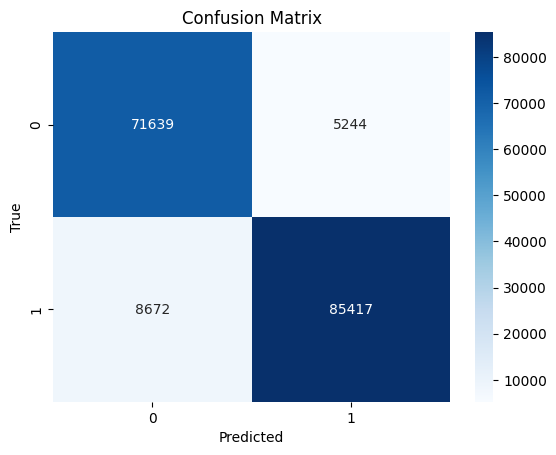

In [3]:
# Dibujar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

5343/5343 [==============================] - 5s 967us/step


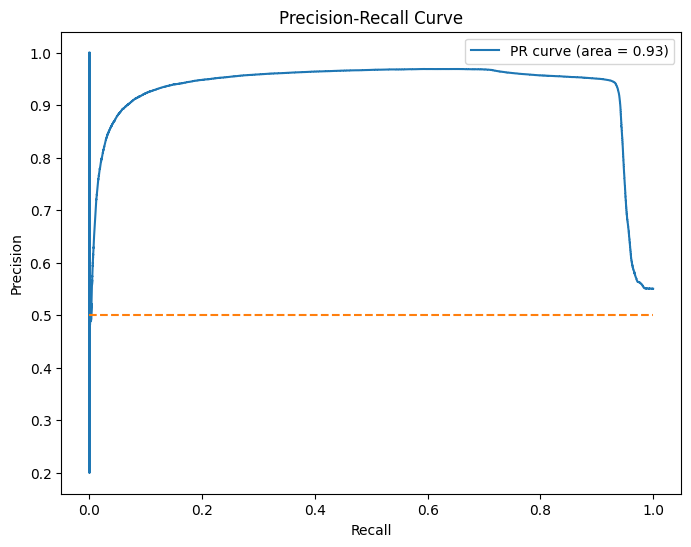

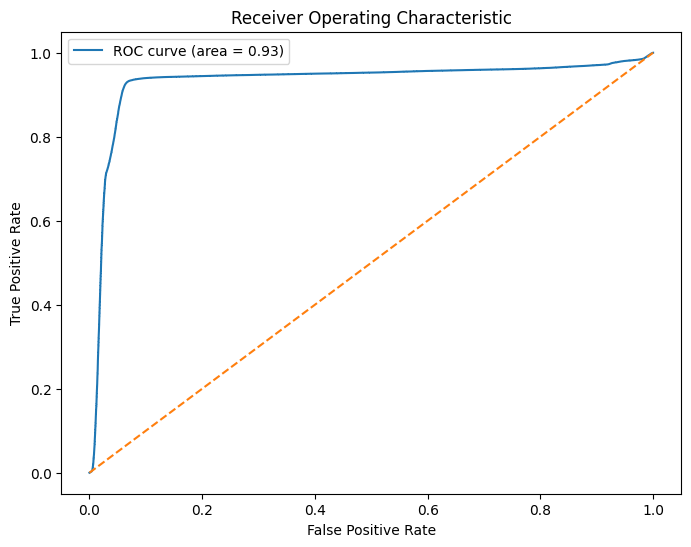

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_proba = model.predict(X_test)[:, 1]  # Probabilidades de la clase positiva
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall, precision)

# Curva PR
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

plt.show()

In [54]:
# Predicción de nuevos datos
new_features = [0, 707, 589, 58525]
new_X = [new_features]

activity_prediction_cat = model.predict(new_X)
activity_prediction = activity_prediction_cat.argmax(axis=1)[0]  # Obtener la clase predicha

if activity_prediction == 1:
    print("Predicted activity: Logon")
else:
    print("Predicted activity: Logoff")

1/1 [==============================] - 0s 82ms/step
Predicted activity: Logoff
